In [254]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

Open file and process data into correct type:

In [255]:
raw_data = open("entropy_data.txt","r")
raw_data = raw_data.read().split(",")
# there is a blank value at the end therefore remove it
raw_data.pop()

processed_data = []
for i in range(len(raw_data)):
    processed_data.append(float(raw_data[i]))
processed_data

[-0.14363945020161079,
 10.0,
 -0.14084953358812993,
 10.06,
 -0.14171334512362457,
 10.12,
 -0.14186314836311179,
 10.18,
 -0.14117193594906546,
 10.24,
 -0.1423588113224542,
 10.3,
 -0.14269323441690887,
 10.36,
 -0.14414754508771194,
 10.42,
 -0.14117193594906546,
 10.48,
 -0.14314315222797666,
 10.54,
 -0.14650663677550615,
 10.6,
 -0.14370872066817503,
 10.66,
 -0.1439512050955123,
 10.72,
 -0.14417064644491773,
 10.78,
 -0.14285472008540678,
 10.84,
 -0.14635613636134598,
 10.9,
 -0.14590477097340757,
 10.96,
 -0.14558083936641947,
 11.02,
 -0.14555770540923937,
 11.08,
 -0.14470212500764712,
 11.14,
 -0.1476419079144325,
 11.2,
 -0.14628668227047217,
 11.26,
 -0.14610149494138583,
 11.32,
 -0.14659926367442389,
 11.38,
 -0.1474796473932202,
 11.44,
 -0.14691194281606149,
 11.5,
 -0.1449564102939902,
 11.56,
 -0.1473174131962133,
 11.62,
 -0.14911504660365585,
 11.68,
 -0.14794331875127453,
 11.74,
 -0.14712044990605788,
 11.8,
 -0.1488364918368272,
 11.86,
 -0.14941690185474613,

Split data into 2 separate lists:

In [256]:
distance, entropy = [], []
for i in range(len(processed_data)):
    if i == 0 or i%2 == 0:
        entropy.append(processed_data[i])
    else:
        distance.append(processed_data[i])

Plot entropy against distance:

Text(0, 0.5, 'Entropy')

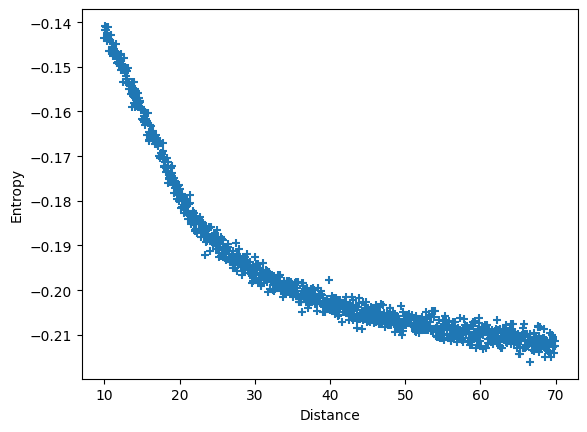

In [257]:
plt.scatter(distance,entropy,marker='+')
plt.xlabel("Distance")
plt.ylabel("Entropy")


Plot gradient against distance:

In [258]:
x_values,y_values = [],[]
for i in range(0,len(processed_data),2):
    x_values.append(processed_data[i+1])
    y_values.append(processed_data[i])

In [259]:
p = np.polyfit(x_values,y_values,3)
p

array([-8.44415753e-07,  1.30767223e-04, -6.87106822e-03, -8.47512912e-02])

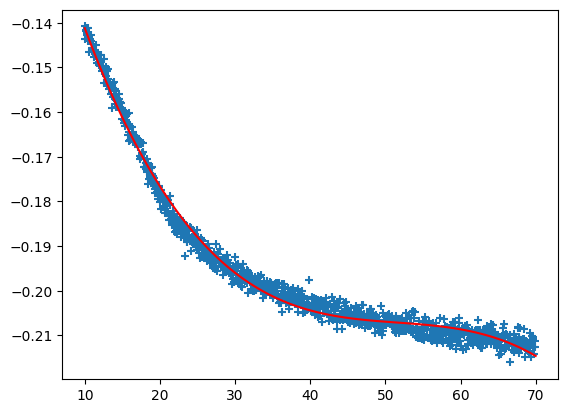

In [260]:
x = np.linspace(10,70,100)
y = (p[0] * x**3) + (p[1] * x**2) + (p[2] * x) + p[3]

plt.scatter(distance,entropy,marker='+')
plt.plot(x,y,"red")

In [261]:
def f(x, a, b, c):
    return (a*(x**b)) + c

p2 = scipy.optimize.curve_fit(f, xdata=x_values,ydata=y_values, p0=(0,-1,2))
p2 = p2[0]
p2

array([ 0.85531435, -0.96048468, -0.22716116])

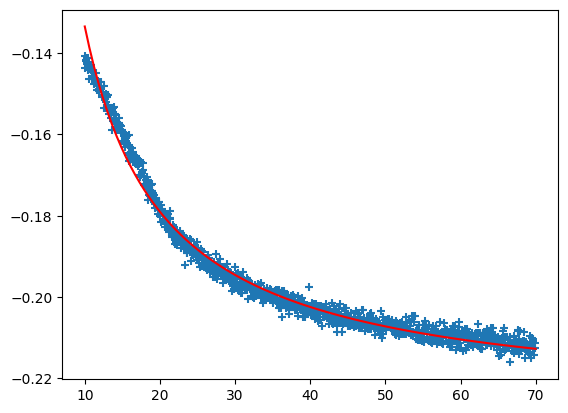

In [262]:
y2 = (p2[0] * (x**p2[1])) + p2[2]

plt.scatter(distance,entropy,marker='+')
plt.plot(x,y2,"red")